In [1]:
# This notebook was written for Python 2.7
import FlowCytometryTools as fct
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
from operator import truediv

%matplotlib inline

In [2]:
blues = sns.color_palette('Blues', 9)
reds = sns.color_palette('Reds', 9)
greens = sns.color_palette('Greens', 9)
oranges = sns.color_palette('Oranges', 9)
grays = sns.color_palette('Greys', 9)



bw = {'axis.labelcolor': 'white', 'xtick.color': 'white', 'ytick.color': 'white',
     'grid.color': 'white', 'axes.edgecolor': 'white', 'axes.facecolor': 'black',
     'text.color': 'white', 'axes.labelcolor': 'white', 'figure.facecolor' : 'black',
     'xtick.major.size': 5.0, 'xtick.minor.size': 5.0, 
      'ytick.major.size': 5.0, 'ytick.minor.size': 5.0, 'axes.linewidth': 1.0}

In [3]:
bw_tickless = {'axis.labelcolor': 'white', 'grid.color': 'white', 
               'axes.edgecolor': 'white', 'axes.facecolor': 'black', 'text.color': 'white', 
               'axes.labelcolor': 'white', 'figure.facecolor' : 'black', 'axes.linewidth': 1.0,
              'xtick.color': 'white', 'ytick.color': 'white'}

## Data import from .fcs files

In [4]:
yLB256 = pd.DataFrame()

time_stamps = ['plus', '0', '1', '2', '3', '4', '6', '24']
times = [-1, 0, 1, 2, 3, 4, 6, 24]

for t in range(len(times)):
    datafile = '2019_01_04/yLB256_t' + time_stamps[t] + '.fcs'
    sample = fct.FCMeasurement(ID = 'yLB256_' + str(time_stamps[t]), datafile = datafile)
    subset = sample.data[['FSC-A', 'SSC-A',
                         'PE-Texas Red-A', 'mCherry-A', 'DsRed-A', 'FITC-A']]
    subset['time'] = times[t]
    yLB256 = pd.concat([yLB256, subset])


In [5]:
yLB297 = pd.DataFrame()

time_stamps = ['plus', '0', '1', '2', '3', '4', '6', '24']
times = [-1, 0, 1, 2, 3, 4, 6, 24]

for t in range(len(times)):
    datafile = '2019_01_04/yLB297_t' + time_stamps[t] + '.fcs'
    sample = fct.FCMeasurement(ID = 'yLB297_' + str(time_stamps[t]), datafile = datafile)
    subset = sample.data[['FSC-A', 'SSC-A',
                         'PE-Texas Red-A', 'mCherry-A', 'DsRed-A', 'FITC-A']]
    subset['time'] = times[t]
    yLB297 = pd.concat([yLB297, subset])



In [6]:
yLB299 = pd.DataFrame()

time_stamps = ['plus', '0', '1', '2', '3', '4', '6', '24']
times = [-1, 0, 1, 2, 3, 4, 6, 24]

for t in range(len(times)):
    datafile = '2019_01_04/yLB299_t' + time_stamps[t] + '.fcs'
    sample = fct.FCMeasurement(ID = 'yLB299_' + str(time_stamps[t]), datafile = datafile)
    subset = sample.data[['FSC-A', 'SSC-A',
                         'PE-Texas Red-A', 'mCherry-A', 'DsRed-A', 'FITC-A']]
    subset['time'] = times[t]
    yLB299 = pd.concat([yLB299, subset])



In [7]:
datafile = '2019_01_04/yLB256_tplus.fcs'
sample = fct.FCMeasurement(ID = 'yLB256_plus', datafile = datafile)

#sample.view_interactively()

In [8]:
scatter_gate = fct.PolyGate([(2.528e+04, 2.864e+04),
                                 (4.752e+04, 1.108e+05),
                                 (9.293e+04, 1.849e+05),
                                 (1.402e+05, 2.503e+05),
                                 (1.951e+05, 2.565e+05),
                                 (2.382e+05, 2.453e+05),
                                 (2.467e+05, 1.426e+05),
                                 (2.121e+05, 8.717e+04),
                                 (1.677e+05, 2.739e+04),
                                 (1.279e+05, 1.431e+04),
                                 (5.698e+04, 1.182e+04),
                                 (2.623e+04, 1.992e+04),
                                 (2.576e+04, 2.988e+04)],
                                ('FSC-A', 'SSC-A'), region='in', name='scatter_gate')

In [9]:
yLB256_gated = pd.DataFrame()

time_stamps = ['plus', '0', '1', '2', '3', '4', '6', '24']
times = [-1, 0, 1, 2, 3, 4, 6, 24]

for t in range(len(times)):
    datafile = '2019_01_04/yLB256_t' + time_stamps[t] + '.fcs'
    sample = fct.FCMeasurement(ID = 'yLB256_' + str(time_stamps[t]), datafile = datafile)
    sample = sample.gate(scatter_gate)
    subset = sample.data[['FSC-A', 'SSC-A',
                         'PE-Texas Red-A', 'mCherry-A', 'DsRed-A', 'FITC-A']]
    subset['time'] = times[t]
    yLB256_gated = pd.concat([yLB256_gated, subset])


/Users/laurabagamery/opt/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [10]:
yLB256_gated.head()
yLB256_gated.tail()
yLB256_gated.sample(n = 5)

,FSC-A,SSC-A,PE-Texas Red-A,mCherry-A,DsRed-A,FITC-A,time
27560,145862.328125,136724.875000,1820.940063,608.299988,659.119995,11751.480469,2
18368,119898.539062,72430.257812,1421.969971,322.630005,552.089966,11028.870117,2
4934,105309.640625,84880.171875,705.869995,500.500000,289.519989,7611.120117,3
15492,123502.640625,95770.468750,42.779999,263.339996,283.359985,7576.709961,1
25124,100053.218750,57100.140625,895.590027,359.589996,960.190002,140.430008,0


In [11]:
yLB297_gated = pd.DataFrame()

time_stamps = ['plus', '0', '1', '2', '3', '4', '6', '24']
times = [-1, 0, 1, 2, 3, 4, 6, 24]

for t in range(len(times)):
    datafile = '2019_01_04/yLB297_t' + time_stamps[t] + '.fcs'
    sample = fct.FCMeasurement(ID = 'yLB297_' + str(time_stamps[t]), datafile = datafile)
    sample = sample.gate(scatter_gate)
    subset = sample.data[['FSC-A', 'SSC-A',
                         'PE-Texas Red-A', 'mCherry-A', 'DsRed-A', 'FITC-A']]
    subset['time'] = times[t]
    yLB297_gated = pd.concat([yLB297_gated, subset])


/Users/laurabagamery/opt/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [12]:
yLB299_gated = pd.DataFrame()

time_stamps = ['plus', '0', '1', '2', '3', '4', '6', '24']
times = [-1, 0, 1, 2, 3, 4, 6, 24]

for t in range(len(times)):
    datafile = '2019_01_04/yLB299_t' + time_stamps[t] + '.fcs'
    sample = fct.FCMeasurement(ID = 'yLB299_' + str(time_stamps[t]), datafile = datafile)
    sample = sample.gate(scatter_gate)
    subset = sample.data[['FSC-A', 'SSC-A',
                         'PE-Texas Red-A', 'mCherry-A', 'DsRed-A', 'FITC-A']]
    subset['time'] = times[t]
    yLB299_gated = pd.concat([yLB299_gated, subset])


/Users/laurabagamery/opt/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [13]:
yLB297_gated.head()
yLB297_gated.tail()
yLB297_gated.sample(n = 5)

,FSC-A,SSC-A,PE-Texas Red-A,mCherry-A,DsRed-A,FITC-A,time
11892,91122.320312,52567.320312,1367.099976,123.199997,29.259998,588.690002,24
1598,149824.296875,106370.609375,2425.439941,708.399963,619.849976,163.680008,6
16516,140207.078125,142807.078125,2816.969971,733.809998,910.909973,18063.390625,1
8920,94047.921875,65657.070312,1924.170044,144.759995,-29.259998,4550.490234,2
21630,121512.218750,148643.765625,1808.849976,458.149994,910.909973,7551.600098,0


In [14]:
yLB299_gated.head()
yLB299_gated.tail()
yLB299_gated.sample(n = 5)

,FSC-A,SSC-A,PE-Texas Red-A,mCherry-A,DsRed-A,FITC-A,time
4552,169684.343750,181995.421875,2286.870117,624.469971,847.769958,12029.549805,1
5394,149147.187500,175902.984375,2407.770020,577.500000,336.489990,13027.440430,2
24264,221136.265625,216908.546875,4640.700195,876.259949,740.739990,20894.310547,3
18086,176099.500000,122826.031250,2292.449951,636.019958,971.739990,15189.690430,-1
29784,87681.062500,168677.828125,3693.959961,513.589966,1537.689941,469.649994,-1


In [15]:
yLB256_pos = yLB256_gated.copy(deep = True)
yLB256_pos.loc[yLB256_pos['FITC-A'] < 1, 'FITC-A'] = 1
yLB256_pos.loc[yLB256_pos['mCherry-A'] < 1, 'mCherry-A'] = 1

In [16]:
yLB297_pos = yLB297_gated.copy(deep = True)
yLB297_pos.loc[yLB297_pos['FITC-A'] < 1, 'FITC-A'] = 1
yLB297_pos.loc[yLB297_pos['mCherry-A'] < 1, 'mCherry-A'] = 1

In [17]:
yLB299_pos = yLB299_gated.copy(deep = True)
yLB299_pos.loc[yLB299_pos['FITC-A'] < 1, 'FITC-A'] = 1
yLB299_pos.loc[yLB299_pos['mCherry-A'] < 1, 'mCherry-A'] = 1

In [18]:
yLB256_joyplot = yLB256_pos[['FITC-A', 'time']]
yLB256_joyplot['FITC-A'] = np.log10(yLB256_joyplot['FITC-A'])

/Users/laurabagamery/opt/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [19]:
yLB297_joyplot = yLB297_pos[['FITC-A', 'time']]
yLB297_joyplot['FITC-A'] = np.log10(yLB297_joyplot['FITC-A'])

/Users/laurabagamery/opt/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [20]:
yLB299_joyplot = yLB299_pos[['FITC-A', 'time']]
yLB299_joyplot['FITC-A'] = np.log10(yLB299_joyplot['FITC-A'])

/Users/laurabagamery/opt/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [21]:
yLB297_joyplot = yLB297_joyplot.assign(genotype = 'hxk2')
yLB299_joyplot = yLB299_joyplot.assign(genotype = 'snf1')
yLB256_joyplot = yLB256_joyplot.assign(genotype = 'wildtype')

combo = pd.concat([yLB299_joyplot, yLB297_joyplot, yLB256_joyplot])

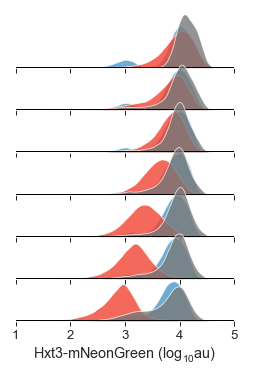

In [22]:
sns.set(style="ticks", rc={"axes.facecolor": (0, 0, 0, 0)})
sns.set_context('paper', font_scale = 1.5)

pal = [blues[5], reds[5], grays[5]]
sns.set_palette(pal)

combo_6h = combo[combo['time'] != 24]
combo_6h = combo_6h[combo_6h['FITC-A'] >= 1]


g = sns.FacetGrid(combo_6h, row = 'time', palette = pal, hue = 'genotype', 
                  aspect = 5, height = 0.75, legend_out = True);
g.map(sns.kdeplot, 'FITC-A', clip_on = False, shade = True, alpha = 0.8, lw = 0);
g.map(plt.axhline, y = 0, lw = 2, color = 'black');

#placeholder_pH = yLB416_pH[['pH', 'time']]



time_labels = ['plus', '0h', '1h', '2h', '3h', '4h', '6h']
times = [-1, 0, 1, 2, 3, 4, 6]

#def label(x, color, label):
#    ax = plt.gca()
#    ax.text(0, 0.2, time_labels[times.index(int(label))], fontweight = 'bold', color = 'black', fontsize = 16,
#           ha = 'left', va = 'center', transform = ax.transAxes)

#g.map(label, 'time')
axes = g.axes
for ax in range(len(axes)):
    axes[ax,0].set_xlim(1,5)
    if ax == 6:
        axes[ax,0].set_xlabel('Hxt3-mNeonGreen ($\mathregular{log_{10}au}$)')

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

g.fig.suptitle('')

# Remove axes details that don't play well with overlap
g.set_titles('')
g.set(yticks=[])
g.despine(bottom=True, left=True)


In [23]:
yLB297_joyplot.tail()

,FITC-A,time,genotype
39995,2.403052,24,hxk2
39996,0.000000,24,hxk2
39997,2.339551,24,hxk2
39998,2.628399,24,hxk2
39999,0.000000,24,hxk2


/Users/laurabagamery/opt/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


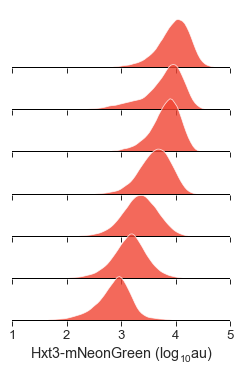

In [24]:
sns.set(style="ticks", rc={"axes.facecolor": (0, 0, 0, 0)})
sns.set_context('paper', font_scale = 1.5)

pal = sns.cubehelix_palette(10, rot=-.25, light=.7)

yLB297_joyplot = yLB297_pos[['FITC-A', 'time']]
yLB297_joyplot['FITC-A'] = np.log10(yLB297_joyplot['FITC-A'])
yLB297_joyplot = yLB297_joyplot[yLB297_joyplot['time'] != 24]

g = sns.FacetGrid(yLB297_joyplot, row = 'time', hue = 'time', 
                  aspect = 5, height = 0.75, legend_out = True);
g.map(sns.kdeplot, 'FITC-A', color = reds[5], shade = True, alpha = 0.8, lw = 0);
g.map(plt.axhline, y = 0, lw = 2, color = 'black');

time_labels = ['plus', '0h', '1h', '2h', '3h', '4h', '6h']
times = [-1, 0, 1, 2, 3, 4, 6]

#def label(x, color, label):
#    ax = plt.gca()
#    ax.text(0, 0.2, time_labels[times.index(int(label))], fontweight = 'bold', color = 'black', fontsize = 16,
#           ha = 'left', va = 'center', transform = ax.transAxes)

#g.map(label, 'time')
axes = g.axes
for ax in range(len(axes)):
    axes[ax,0].set_xlim(1,5)
    if ax == 6:
        axes[ax,0].set_xlabel('Hxt3-mNeonGreen ($\mathregular{log_{10}au}$)')

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

g.fig.suptitle('')

# Remove axes details that don't play well with overlap
g.set_titles('')
g.set(yticks=[])
g.despine(bottom=True, left=True)

/Users/laurabagamery/opt/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


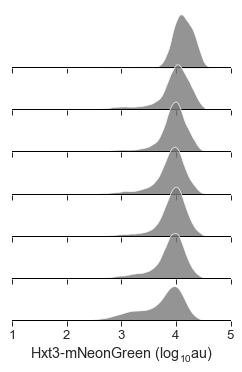

In [25]:
sns.set(style="ticks", rc={"axes.facecolor": (0, 0, 0, 0)})
sns.set_context('paper', font_scale = 1.5)

pal = sns.cubehelix_palette(10, rot=-.25, light=.7)

yLB256_joyplot = yLB256_pos[['FITC-A', 'time']]
yLB256_joyplot['FITC-A'] = np.log10(yLB256_joyplot['FITC-A'])
yLB256_joyplot = yLB256_joyplot[yLB256_joyplot['time'] != 24]

g = sns.FacetGrid(yLB256_joyplot, row = 'time', hue = 'time', 
                  aspect = 5, height = 0.75, legend_out = True);
g.map(sns.kdeplot, 'FITC-A', color = grays[5], shade = True, alpha = 0.8, lw = 0);
g.map(plt.axhline, y = 0, lw = 2, color = 'black');

time_labels = ['plus', '0h', '1h', '2h', '3h', '4h', '6h']
times = [-1, 0, 1, 2, 3, 4, 6]

#def label(x, color, label):
#    ax = plt.gca()
#    ax.text(0, 0.2, time_labels[times.index(int(label))], fontweight = 'bold', color = 'black', fontsize = 16,
#           ha = 'left', va = 'center', transform = ax.transAxes)

#g.map(label, 'time')
axes = g.axes
for ax in range(len(axes)):
    axes[ax,0].set_xlim(1,5)
    if ax == 6:
        axes[ax,0].set_xlabel('Hxt3-mNeonGreen ($\mathregular{log_{10}au}$)')

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

g.fig.suptitle('')

# Remove axes details that don't play well with overlap
g.set_titles('')
g.set(yticks=[])
g.despine(bottom=True, left=True)

/Users/laurabagamery/opt/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


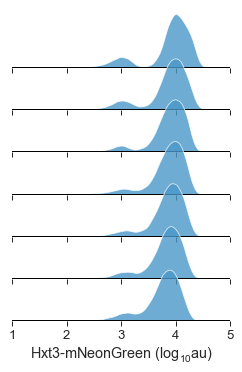

In [26]:
sns.set(style="ticks", rc={"axes.facecolor": (0, 0, 0, 0)})
sns.set_context('paper', font_scale = 1.5)

pal = sns.cubehelix_palette(10, rot=-.25, light=.7)

yLB299_joyplot = yLB299_pos[['FITC-A', 'time']]
yLB299_joyplot['FITC-A'] = np.log10(yLB299_joyplot['FITC-A'])
yLB299_joyplot = yLB299_joyplot[yLB299_joyplot['time'] != 24]

g = sns.FacetGrid(yLB299_joyplot, row = 'time', hue = 'time', 
                  aspect = 5, height = 0.75, legend_out = True);
g.map(sns.kdeplot, 'FITC-A', color = blues[5], shade = True, alpha = 0.8, lw = 0);
g.map(plt.axhline, y = 0, lw = 2, color = 'black');

time_labels = ['plus', '0h', '1h', '2h', '3h', '4h', '6h']
times = [-1, 0, 1, 2, 3, 4, 6]

#def label(x, color, label):
#    ax = plt.gca()
#    ax.text(0, 0.2, time_labels[times.index(int(label))], fontweight = 'bold', color = 'black', fontsize = 16,
#           ha = 'left', va = 'center', transform = ax.transAxes)

#g.map(label, 'time')
axes = g.axes
for ax in range(len(axes)):
    axes[ax,0].set_xlim(1,5)
    if ax == 6:
        axes[ax,0].set_xlabel('Hxt3-mNeonGreen ($\mathregular{log_{10}au}$)')

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

g.fig.suptitle('')

# Remove axes details that don't play well with overlap
g.set_titles('')
g.set(yticks=[])
g.despine(bottom=True, left=True)

/Users/laurabagamery/opt/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/laurabagamery/opt/anaconda3/envs/py27/lib/python2.7/site-packages/matplotlib/tight_layout.py:209: UserWarning: tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes height small enough '


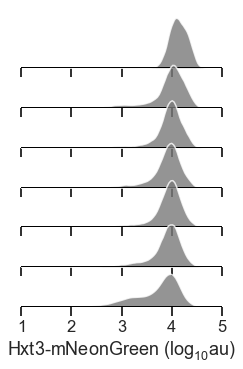

In [27]:
sns.set(style="ticks", rc={"axes.facecolor": (0, 0, 0, 0)})
sns.set_context('talk')

pal = sns.cubehelix_palette(10, rot=-.25, light=.7)

yLB256_joyplot = yLB256_pos[['FITC-A', 'time']]
yLB256_joyplot['FITC-A'] = np.log10(yLB256_joyplot['FITC-A'])
yLB256_joyplot = yLB256_joyplot[yLB256_joyplot['time'] != 24]

g = sns.FacetGrid(yLB256_joyplot, row = 'time', hue = 'time', 
                  aspect = 5, height = 0.75, legend_out = True);
g.map(sns.kdeplot, 'FITC-A', color = grays[5], shade = True, alpha = 0.8, lw = 0);
g.map(plt.axhline, y = 0, lw = 2, color = 'black');

time_labels = ['plus', '0h', '1h', '2h', '3h', '4h', '6h']
times = [-1, 0, 1, 2, 3, 4, 6]

#def label(x, color, label):
#    ax = plt.gca()
#    ax.text(0, 0.2, time_labels[times.index(int(label))], fontweight = 'bold', color = 'black', fontsize = 16,
#           ha = 'left', va = 'center', transform = ax.transAxes)

#g.map(label, 'time')
axes = g.axes
for ax in range(len(axes)):
    axes[ax,0].set_xlim(1,5)
    if ax == 6:
        axes[ax,0].set_xlabel('Hxt3-mNeonGreen ($\mathregular{log_{10}au}$)')

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

g.fig.suptitle('')

# Remove axes details that don't play well with overlap
g.set_titles('')
g.set(yticks=[])
g.despine(bottom=True, left=True)

/Users/laurabagamery/opt/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


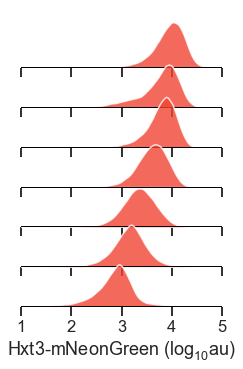

In [28]:
sns.set(style="ticks", rc={"axes.facecolor": (0, 0, 0, 0)})
sns.set_context('talk')

pal = sns.cubehelix_palette(10, rot=-.25, light=.7)

yLB297_joyplot = yLB297_pos[['FITC-A', 'time']]
yLB297_joyplot['FITC-A'] = np.log10(yLB297_joyplot['FITC-A'])
yLB297_joyplot = yLB297_joyplot[yLB297_joyplot['time'] != 24]

g = sns.FacetGrid(yLB297_joyplot, row = 'time', hue = 'time', 
                  aspect = 5, height = 0.75, legend_out = True);
g.map(sns.kdeplot, 'FITC-A', color = reds[5], shade = True, alpha = 0.8, lw = 0);
g.map(plt.axhline, y = 0, lw = 2, color = 'black');

time_labels = ['plus', '0h', '1h', '2h', '3h', '4h', '6h']
times = [-1, 0, 1, 2, 3, 4, 6]

#def label(x, color, label):
#    ax = plt.gca()
#    ax.text(0, 0.2, time_labels[times.index(int(label))], fontweight = 'bold', color = 'black', fontsize = 16,
#           ha = 'left', va = 'center', transform = ax.transAxes)

#g.map(label, 'time')
axes = g.axes
for ax in range(len(axes)):
    axes[ax,0].set_xlim(1,5)
    if ax == 6:
        axes[ax,0].set_xlabel('Hxt3-mNeonGreen ($\mathregular{log_{10}au}$)')

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

g.fig.suptitle('')

# Remove axes details that don't play well with overlap
g.set_titles('')
g.set(yticks=[])
g.despine(bottom=True, left=True)

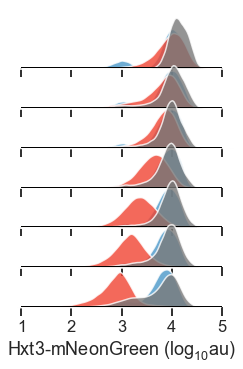

In [29]:
sns.set(style="ticks", rc={"axes.facecolor": (0, 0, 0, 0)})
sns.set_context('talk')

pal = [blues[5], reds[5], grays[5]]
sns.set_palette(pal)

combo_6h = combo[combo['time'] != 24]
combo_6h = combo_6h[combo_6h['FITC-A'] >= 1]


g = sns.FacetGrid(combo_6h, row = 'time', palette = pal, hue = 'genotype', 
                  aspect = 5, height = 0.75, legend_out = True);
g.map(sns.kdeplot, 'FITC-A', clip_on = False, shade = True, alpha = 0.8, lw = 0);
g.map(plt.axhline, y = 0, lw = 2, color = 'black');

#placeholder_pH = yLB416_pH[['pH', 'time']]



time_labels = ['plus', '0h', '1h', '2h', '3h', '4h', '6h']
times = [-1, 0, 1, 2, 3, 4, 6]

#def label(x, color, label):
#    ax = plt.gca()
#    ax.text(0, 0.2, time_labels[times.index(int(label))], fontweight = 'bold', color = 'black', fontsize = 16,
#           ha = 'left', va = 'center', transform = ax.transAxes)

#g.map(label, 'time')
axes = g.axes
for ax in range(len(axes)):
    axes[ax,0].set_xlim(1,5)
    if ax == 6:
        axes[ax,0].set_xlabel('Hxt3-mNeonGreen ($\mathregular{log_{10}au}$)')

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

g.fig.suptitle('')

# Remove axes details that don't play well with overlap
g.set_titles('')
g.set(yticks=[])
g.despine(bottom=True, left=True)